In [2]:
file_path = "C:\\Users\\ts\\Desktop\\AI Test Agent 产品介绍_v1.2R3.pdf"

In [19]:
# 从 langchain_community 导入 PDF 加载器
from langchain_community.document_loaders import PyPDFLoader

# 1. 创建一个加载器实例，并告诉它要加载哪个文件
loader = PyPDFLoader(file_path)
# 2. 准备一个空列表，用来存放加载后的页面
pages = []

# 3. 异步逐页加载（这是一个高级用法）
async for page in loader.alazy_load():
    pages.append(page)

# print(f"size:{len(pages)}")
# --- 单元格 4: 检查加载结果 ---
# 打印第一页的 "元数据" (metadata)
print(f"{pages[0].metadata}\n")

# 打印第一页的 "页面内容" (page_content)
print(pages[0].page_content)

{'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creator': 'Microsoft® PowerPoint® 2021', 'creationdate': '2025-09-10T18:52:17+08:00', 'moddate': '2025-09-10T10:52:17+00:00', 'source': 'C:\\Users\\ts\\Desktop\\AI Test Agent 产品介绍_v1.2R3.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}

143,0,10 182,0,12 188,53,34 219,78,60 250,90,101 255,255,255 169,176,184222,230,238 0,0,0
www.thundersoft.com
Copyright© 2025 Thundersoft Technology Co., Ltd. All rights reserved.
AI Test Agent 产品介绍
智能化测试解决方案


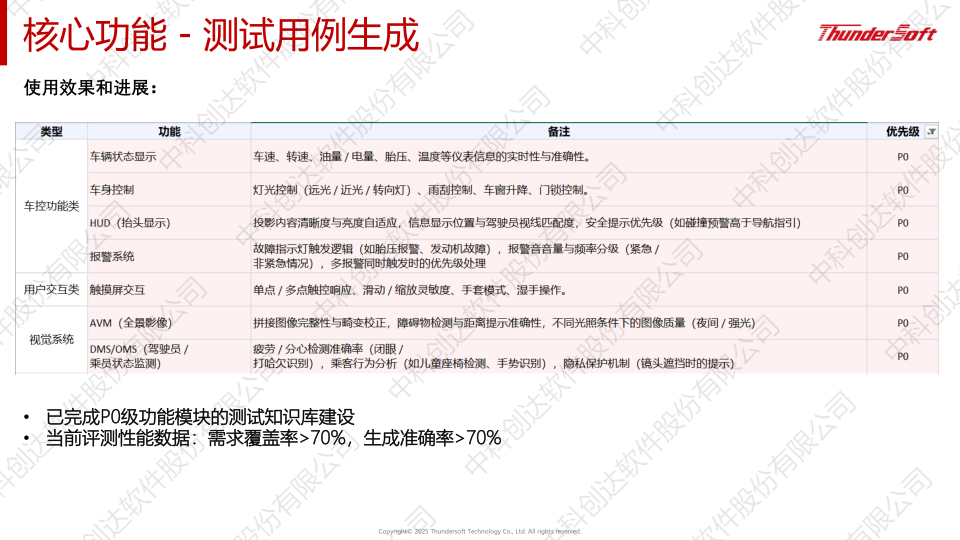

In [3]:
# --- 单元格 1: 导入依赖库 ---
import base64
import io
import fitz  # PyMuPDF 库，用来操作 PDF
from PIL import Image  # Pillow 库，用来处理图像

# --- 单元格 2: 定义 PDF 页面转 Base64 图像的函数 ---

def pdf_page_to_base64(pdf_path: str, page_number: int) -> str:
    """
    将 PDF 的指定页面转换为 Base64 编码的 PNG 图像字符串。
    
    参数:
    pdf_path (str): PDF 文件的路径。
    page_number (int): 要转换的页码 (从 1 开始计数)。
    """
    
    # 1. 使用 fitz (PyMuPDF) 打开 PDF 文件
    pdf_document = fitz.open(pdf_path)
    
    # 2. 加载指定页面 (fitz 是 0 索引的, 所以用户传入的第 1 页对应索引 0)
    # input is one-indexed (输入是从1开始的索引)
    page = pdf_document.load_page(page_number - 1) 
    
    # 3. 将页面渲染为“像素图” (pixmap)
    pix = page.get_pixmap()
    
    # 4. 使用 PIL (Pillow) 将像素图转换为图像对象
    # 'RGB' 是颜色模式, 后面是图像的宽、高和原始像素数据
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    # 5. 创建一个内存中的“二进制文件”缓冲区
    buffer = io.BytesIO()
    
    # 6. 将图像以 PNG 格式保存到内存缓冲区中
    img.save(buffer, format="PNG")
    
    # 7. 将缓冲区中的图像数据进行 Base64 编码，并返回文本字符串
    return base64.b64encode(buffer.getvalue()).decode("utf-8")

# --- 单元格 3: 在 Jupyter Notebook 中显示图像 ---

from IPython.display import Image as IPImage
from IPython.display import display

# 1. 调用函数，获取第 11 页的 Base64 编码字符串
base64_image = pdf_page_to_base64(file_path, 11)

# 2. 在 Notebook 中显示这张图片
# IPImage 需要的是原始的图像字节，所以我们先用 b64decode 解码
display(IPImage(data=base64.b64decode(base64_image)))

In [4]:
# --- 1. 定义LLM模型 ---
# 注意：你需要先设置你的API密钥和可能的访问地址作为环境变量
import os
from langchain_openai import ChatOpenAI
model = ChatOpenAI(
    model="doubao-seed-1-6-flash-250828", # 截图中为 gpt-4o-mini，这是一个强大的多模态模型
    temperature=0,
    api_key=os.environ.get("DOUBAO-API-KEY"),
    base_url="https://ark.cn-beijing.volces.com/api/v3",
)

# --- 单元格 2: 构造多模态消息并调用 ---
from langchain_core.messages import HumanMessage

# 1. 你的文本问题
query = "车控功能类的优先级？"

# 2. 假设 'base64_image' 变量已经存在
#    这个变量就是我们上一个例子中 pdf_page_to_base64() 函数返回的
#    那一长串 Base64 编码的图像字符串。
#    (在这里你需要先运行上一个例子的代码来获取它)
#
# -------------------------------------------------------------------
# 示例：你可能需要先运行这一段来获取 base64_image
# (请确保你已经有了上一节课的 pdf_page_to_base64 函数和 PDF 文件)
#
# try:
#     base64_image = pdf_page_to_base64(file_path, 11) # 假设 file_path 也已定义
# except NameError:
#     print("错误：请先定义 pdf_page_to_base64 函数和 file_path 变量")
#     base64_image = "" # 给一个空值防止下面代码报错
# -------------------------------------------------------------------


# 3. 构造一个包含“文本”和“图像”的 HumanMessage
message = HumanMessage(
    content=[
        {
            "type": "text", 
            "text": query
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        }
    ]
)

# 4. 将这个“图文并茂”的消息发送给 LLM
response = model.invoke([message])

# 5. 打印 LLM 的回答
print(response.content)

从提供的PPT表格及相关信息来看，**车控功能类的优先级均为P0（最高优先级）**，具体分析如下：


### **1. 车控功能类的范围与优先级**  
PPT中“车控功能类”包含4个子功能，每个功能的优先级均标注为 **P0**：  
- **车辆状态显示**：车速、转速、油量/电量、胎压、温度等仪表信息的实时性与准确性。  
- **车身控制**：灯光控制（远光/近光/转向灯）、雨刮控制、车窗升降、门锁控制。  
- **HUD（抬头显示）**：投影内容清晰度与亮度自适应、信息显示位置匹配度、安全提示优先级（如碰撞预警高于导航指引）。  
- **报警系统**：故障指示灯触发逻辑、报警音量/频率分级、多报警同时触发的优先级处理。  


### **2. P0优先级的含义与合理性**  
P0通常代表**最高优先级**，即“必须覆盖、核心且直接影响安全/基础体验的功能”。结合车控功能的具体场景，优先级为P0的原因如下：  
- **安全核心**：车辆状态显示（基础驾驶数据）、报警系统（故障/安全预警）、HUD（驾驶辅助信息）均直接关系到行车安全，任何失效可能导致事故。  
- **基础控制**：车身控制（灯光、雨刮、车窗、门锁）是日常驾驶的核心操作，功能失效会影响舒适性与安全性。  
- **用户依赖**：车控功能是用户与车辆交互的基础入口，P0级优先级确保其稳定性与准确性，是车辆正常运行的前提。  


### **3. 实际进展验证**  
PPT提到“已完成P0级功能模块的测试知识库建设”，且“需求覆盖率>70%，生成准确率>70%”，说明车控功能类（P0级）已被重点覆盖，测试用例生成质量较高，进一步验证了其优先级的必要性。


### **结论**  
**车控功能类的优先级为P0（最高优先级）**，涵盖车辆状态显示、车身控制、HUD、报警系统，这些功能是车辆安全运行与基础体验的核心，必须优先保障测试与质量。


In [11]:
import os
from openai import OpenAI

# 请确保您已将 API Key 存储在环境变量 ARK_API_KEY 中
# 初始化Ark客户端，从环境变量中读取您的API Key
client = OpenAI(
    # 此为默认路径，您可根据业务所在地域进行配置
    base_url="https://ark.cn-beijing.volces.com/api/v3",
    # 从环境变量中获取您的 API Key。此为默认方式，您可根据需要进行修改
    api_key="",
)

response = client.chat.completions.create(
    # 指定您创建的方舟推理接入点 ID，此处已帮您修改为您的推理接入点 ID
    model="doubao-seed-1-6-flash-250828",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://ark-project.tos-cn-beijing.ivolces.com/images/view.jpeg"
                    },
                },
                {"type": "text", "text": "这是哪里？"},
            ],
        }
    ],
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='这张图片展示的是一处拥有壮丽雪山、茂密森林和宁静湖泊的自然景观，很可能位于**北美洲的落基山脉区域**，具体来说，这类景观常见于加拿大或美国的国家公园内，例如：\n\n\n### 典型地点推测：\n1. **加拿大落基山脉**（如班夫国家公园、贾斯珀国家公园）：  \n   这里有翡翠湖、路易斯湖等著名高山湖泊，雪山、针叶林与澄澈湖水构成绝美画卷，是皮划艇、徒步等户外爱好者的热门目的地。\n\n2. **美国大提顿国家公园/黄石国家公园**（怀俄明州）：  \n   杰克逊湖、黄石湖周边同样有雪山森林环绕的湖泊景观，与图中地貌高度契合。\n\n\n### 核心特征：\n- **地理元素**：冰川作用形成的高山湖泊、积雪覆盖的落基山脉、茂密的针叶林（如松、云杉），共同构成了“雪山—森林—湖泊”的经典组合。  \n- **活动场景**：皮划艇是落基山脉湖泊的常见休闲方式，图中橙色皮划艇与开阔湖面也符合当地旅游特色。\n\n\n这类景观是落基山脉地区（北美大陆重要的造山带）的典型代表，具体地点可能因视角或艺术化处理难以精确到单一湖泊，但大概率属于加拿大或美国落基山脉的国家公园区域。', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None, reasoning_content='\n用户现在需要判断这张图片是哪里。首先看图片内容：一个人在橙色皮划艇上，湖面平静，远处是雪山，山脚下有茂密的森林。环境看起来很开阔，自然景观壮丽，应该是高山湖泊区域，可能是像加拿大落基山脉的湖泊，或者美国的黄石公园附近？\n\n首先，分析元素：雪山、森林、湖泊。这种景观常见于北美落基山脉的国家公园，比如加拿大的班夫国家公园、贾斯珀国家公园，或者美国的优胜美地、大提顿等。比如加拿大的明尼万卡湖、翡翠湖，或者美国的杰克逊湖，这些地方都有雪山、森林和湖泊，适合皮划艇。\n\n但具体哪里呢？可能需要更多线索。图片色调偏冷，蓝调，雪山轮廓清晰，森林茂密，湖泊广阔。这类地方通常是高海拔地

In [5]:
import bs4 # 导入 bs4 (beautifulsoup4)，即使没显式调用，WebBaseLoader 也会在内部使用它
from langchain_community.document_loaders import WebBaseLoader

# 1. 定义你想要抓取的网页 URL
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

# 2. 创建一个 WebBaseLoader 实例
#    注意参数是 web_paths (复数)，它接受一个 URL 列表
loader = WebBaseLoader(web_paths=[page_url])

# 3. 异步逐页加载 (因为我们只传了一个 URL，所以只会加载一个 "doc")
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

# --- 单元格 3: 检查和打印结果 ---

# 1. 断言：确保我们只加载到了 1 个文档
assert len(docs) == 1

# 2. 把唯一的文档从列表中取出来，方便操作
doc = docs[0]

# 3. 打印元数据 (metadata)
print(f"{doc.metadata}\n")

# 4. 打印页面内容 (只打印前 500 个字符，并去除首尾空格)
print(doc.page_content[:500].strip())

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 1/1 [00:00<00:00,  3.40it/s]

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/', 'title': 'How to add memory to chatbots | 🦜️🔗 LangChain', 'description': 'A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:', 'language': 'en'}

How to add memory to chatbots | 🦜️🔗 LangChain








Skip to main content⚠️ THESE DOCS ARE OUTDATED. Visit the new v1.0 docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseindexBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extra


In [7]:
# --- 1. 引入依赖包 ---
# 导入 bs4 (beautifulsoup4) 是必须的，因为我们要用到它的 SoupStrainer
import bs4 
from langchain_community.document_loaders import WebBaseLoader

# --- 2. 定义要抓取的 URL ---
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

# --- 4. 实例化加载器，并传入我们的定制参数 ---
loader = WebBaseLoader(
    web_paths=[page_url],
    bs_get_text_kwargs={"separator": " | ", "strip": True}  # <--- 在这里把我们的“过滤器”传进去
)

# --- 5. 加载文档 ---
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

assert len(docs) == 1
doc = docs[0]

# --- 6. 打印结果 ---
# 打印元数据
print(f"{doc.metadata}\n")

# 打印页面内容 (只打印前 500 个字符)
# 你会发现，这次的内容干净多了，没有导航栏信息了
print(doc.page_content[:500])

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/', 'title': 'How to add memory to chatbots | 🦜️🔗 LangChain', 'description': 'A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:', 'language': 'en'}

How to add memory to chatbots | 🦜️🔗 LangChain | Skip to main content | ⚠️ THESE DOCS ARE OUTDATED. | Visit the new v1.0 docs | Integrations | API Reference | More | Contributing | People | Error reference | LangSmith | LangGraph | LangChain Hub | LangChain JS/TS | v0.3 | v0.3 | v0.2 | v0.1 | 💬 | Search | Introduction | Tutorials | Build a Question Answering application over a Graph Database | index | Build a simple LLM application with chat models and prompt templates | Build a Chatbot | Build a


In [13]:
from langchain_unstructured import UnstructuredLoader

page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

loader = WebBaseLoader(page_url)

docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

# print(f"UnstructuredLoader 加载并分割成了 {len(docs)} 个文档块。\n")

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]


In [14]:
for doc in docs[:5]:
    print("--- (新文档块) ---")
    print(doc.page_content)
    print("\n")

--- (新文档块) ---





How to add memory to chatbots | 🦜️🔗 LangChain








Skip to main content⚠️ THESE DOCS ARE OUTDATED. Visit the new v1.0 docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseindexBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesindexHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocation args to a RunnableH

# 加载 CSV

In [20]:
from langchain_community.document_loaders.csv_loader import CSVLoader

file_path = "../materials/test.csv"
print(f"文件是否存在: {os.path.exists(file_path)}")

loader = CSVLoader(file_path)

data = loader.load()

for record in data[:2]:
    print(record)
    
    
loader = CSVLoader(file_path, source_column="Project")

data = loader.load()

for record in data[:2]:
    print(record)

文件是否存在: True
page_content='Project: A
Numbers: 25' metadata={'source': '../materials/test.csv', 'row': 0}
page_content='Project: B
Numbers: 38' metadata={'source': '../materials/test.csv', 'row': 1}
page_content='Project: A
Numbers: 25' metadata={'source': 'A', 'row': 0}
page_content='Project: B
Numbers: 38' metadata={'source': 'B', 'row': 1}


# 自定义文档加载器

In [21]:
from typing import AsyncIterator, Iterator
from langchain_core.document_loaders import BaseLoader
from langchain_core.documents import Document

class CustomDocumentLoader(BaseLoader):
    """通行读取文件的文档加载器示例"""
    
    def __init__(self, file_path: str) -> None:
        """使用文件路径初始化加载器
        
        参数:
            file_path: 要加载的文件路径
        """
        self.file_path = file_path

    def lazy_load(self) -> Iterator[Document]:
        """进行读取文件的性能加载器
        
        当实现懒加载方法时，你应该使用生成器
        一次生成一个文档
        """
        with open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

    # alazy_load 是可调用的
    # 如果不实现它，将使用一个默认实现，该实现会委托给 lazy_load!
    async def alazy_load(
        self,
    ) -> AsyncIterator[Document]:  # -- 不接受任何参数
        """逐行读取文件的异步性加载"""
        # 需要安装 aiofiles（通过 pip 安装）
        # https://github.com/Tinche/aiofiles
        import aiofiles

        async with aiofiles.open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            async for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

In [22]:
# 创建测试文件
with open("meow.txt", "w", encoding="utf-8") as f:
    quality_content = "meow meow😻\nmeow meow😻\nmeow😻😻"
    f.write(quality_content)

# 使用自定义加载器
loader = CustomDocumentLoader("meow.txt")

## 测试加载器
for doc in loader.lazy_load():
    print()
    print(type(doc))
    print(doc)


<class 'langchain_core.documents.base.Document'>
page_content='meow meow😻
' metadata={'line_number': 0, 'source': 'meow.txt'}

<class 'langchain_core.documents.base.Document'>
page_content='meow meow😻
' metadata={'line_number': 1, 'source': 'meow.txt'}

<class 'langchain_core.documents.base.Document'>
page_content='meow😻😻' metadata={'line_number': 2, 'source': 'meow.txt'}
